In [31]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Data

In [32]:
#Data include information about videogames - year of release, sales numbers, critic score etc.

In [33]:
#import data and drop row with nan
df = pd.read_csv('C:/Users/BIONIC Admin/Desktop/ML_home/Video_Games_Sales_as_at_22_Dec_2016.csv')
df = df.dropna()

# Data exploration with visualization

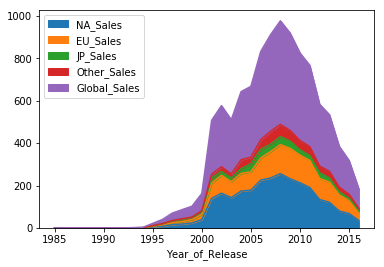

In [34]:
#plot shows sales in different regions depend by year
sales_df = df[[x for x in df.columns if  'Sales' in x]+ ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot.area()

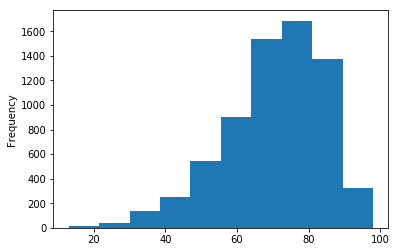

In [35]:
#distribution critic score (very similar to normal distribution)
df['Critic_Score'].plot.hist()

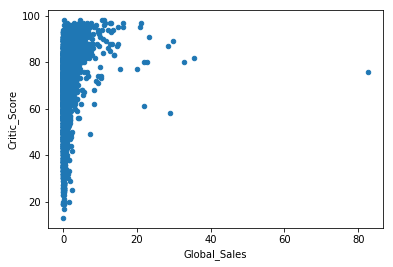

In [36]:
#plot shows dependence dlobal sales and critic score

df.plot.scatter(x='Global_Sales', y='Critic_Score')


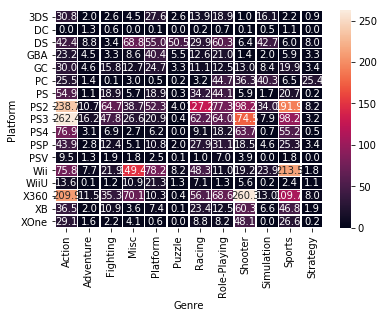

In [37]:
#corelation matric
platform_genre_sales = df.pivot_table(
                        index = 'Platform',
                        columns = 'Genre',
                        values = 'Global_Sales',
                        aggfunc = sum).fillna(0).applymap(float)
sb.heatmap(platform_genre_sales, annot=True, fmt='.1f',linewidths = .5)

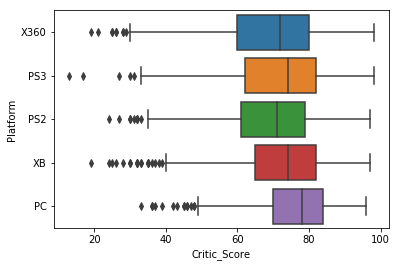

In [38]:
#boxplot for diferens types of platform for games and critic score
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sb.boxplot(y = 'Platform', x = 'Critic_Score', data = df[df.Platform.isin(top_platforms)], orient = 'h')

# Data processing

In [39]:
#replace year of release on 1 if game had realeaed after 2007 and 0 if early
#this we will use in predictin
#getting dummies for data

df.loc[df['Year_of_Release'] <= 2007, 'Year_of_Release'] = 0
df.loc[df['Year_of_Release'] > 2007, 'Year_of_Release'] = 1


df1 = df[["Platform",'Year_of_Release', "Genre","NA_Sales",'EU_Sales',"JP_Sales","Other_Sales","Global_Sales","Critic_Score",'User_Score']].copy()


df1 = pd.get_dummies(df1)



In [40]:
#delete outliers in Critic Score and Global Sales

z = np.abs(stats.zscore(df1['Critic_Score']))
k = np.abs(stats.zscore(df1['Global_Sales']))

df2=df1[z<3]
df2=df1[k<3]
len(df1),len(df2)

(6825, 6744)

(array([3513.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3231.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

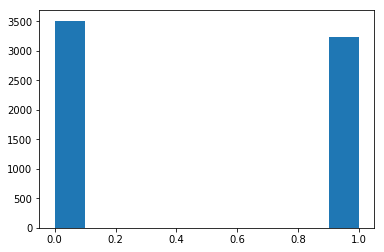

In [41]:
#see is the data balanced (see that yes)
plt.hist(df2['Year_of_Release'])

In [42]:
#scale data

df3 = df2.drop(columns=['Year_of_Release'])
rs = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))

X_scaled = rs.fit_transform(df3)
y = df2['Year_of_Release']

# Models

### Metric: r_squared

In [43]:
#make test and train sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=0)

In [44]:
# get R^2 score of given model on given data
#make cross validation on ElasticNet and Ridge models
elastic_reg = ElasticNet(alpha=0.0001, l1_ratio=0)
ridge_reg = Ridge(alpha=0.0001)
models = [elastic_reg, ridge_reg]
titles = [ 'ElasticNet', 'Ridge']


In [45]:
print('      Model                 R-squared score')
for i in range(len(models)):
    scores = cross_val_score(models[i], X_train, y_train, cv=13, scoring='r2')
    print(f"{titles[i]:17}:    {scores.mean():10} (+/- {scores.std() * 2})")

      Model                 R-squared score


c:\users\bionic admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\bionic admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\bionic admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\bionic admin\appdata\local\programs\p

ElasticNet       :    0.5655800929418817 (+/- 0.03523257506886534)
Ridge            :    0.564777162608834 (+/- 0.035870118912108645)


In [46]:
#Results are very similar, but ElasticNet a little bit better

In [47]:
elastic_reg = ElasticNet(alpha=0.0001, l1_ratio=0)
elastic_reg.fit(X_train, y_train)
y_pred = elastic_reg.predict(X_test)
print('Model: ElasticNet')
print('r-squred score:', r2_score(y_test, y_pred))

Model: ElasticNet
r-squred score: 0.6010121197809648


c:\users\bionic admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
